In [ ]:
from sklearn import datasets

In [ ]:
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
def split_80_20(x, y):
  row_count = -1 * int(0.2 * len(x))
  # row_count = -20
  return x[:row_count], x[row_count:], y[:row_count], y[row_count:]

In [ ]:
split_data = split_80_20(diabetes.data, diabetes.target)

for data in split_data:
  print(data.shape)

x_train, x_test, y_train, y_test = split_data

# Choosing bmi alone to visualize one feature in 2D plot
x_train = x_train[..., 2].reshape(-1, 1)
x_test = x_test[..., 2].reshape(-1, 1)

print(f"The names of the features in the dataset are:\n{diabetes.feature_names}")

(354, 10)
(88, 10)
(354,)
(88,)
The names of the features in the dataset are:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = LinearRegression().fit(x_train, y_train)
bcap = np.insert(model.coef_, 0, model.intercept_, 0)
y_test_cap = model.predict(x_test)
mse = mean_squared_error(y_test, y_test_cap)

print(f"Model parameters b^: {bcap}")
print(f"Mean squared error in prediction: {mse}")

Model parameters b^: [152.08225582 957.00838948]
Mean squared error in prediction: 4124.815395135287


In [ ]:
import matplotlib.pyplot as plt

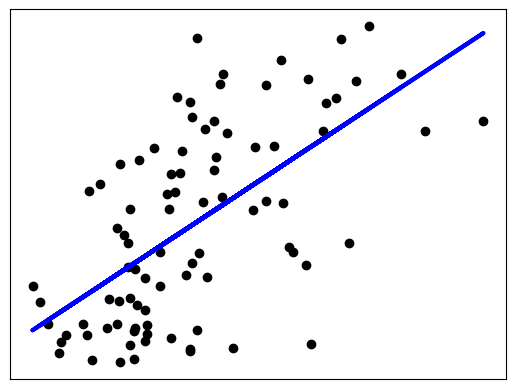

In [ ]:
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_test_cap, color='blue', linewidth=3)

# Passing empty tuple to hide axis labels
plt.xticks(())
plt.yticks(())

plt.show()